In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 20, 12
# sns.set(rc={"figure.figsize":(20, 12)})
# sns.set_theme(style="whitegrid", palette=None)
sns.set(style="whitegrid", palette=None, rc={"figure.figsize":(20, 12)})

In [9]:
outperformance_df = pd.read_csv("../data/processed/cumulative_outperformance.csv", index_col=0)

In [12]:
outperformance_df.index = pd.to_datetime(outperformance_df.index)

In [13]:
outperformance_df

,SAA vs Benchmark,Manager vs SAA,Manager Drift vs Daily Rebalance
2022-10-31,0.004493,0.009826,-0.004704
2022-10-28,0.004363,0.012167,-0.004679
2022-10-27,0.004010,0.011311,-0.004732
2022-10-26,0.004505,0.012811,-0.004643
2022-10-25,0.005143,0.014337,-0.004337
...,...,...,...
2020-03-12,-0.000681,0.001445,0.002012
2020-03-11,-0.000630,-0.000359,0.000025
2020-03-10,-0.000774,0.001653,-0.000399
2020-03-09,-0.000890,0.003937,0.000523


# Portfolio Attribution Findings

We see from our analysis that our strategic asset allocation is generating consistent but fairly modest active return over the index benchmark.

Contrastingly, our manager allocation decisions are generating a very volatile active return series over the SAA. This series perhaps is indicative that some of our suspicions from the exploratory data analysis are correct. 

We noticed in our EDA that there was perhaps some "false diversification" occurring through the use of some funds. Some funds which claimed to have exposure to foreign asset classes were actually quite correlated with US and Canadian equity markets moreso than the asset they claimed to be based on. This may mean that we are overestimating our diversification and the higher returns that we observe in this series may or may not be justified on a risk-adjusted basis. This could be a useful area of future analysis.

Additionally, we highlighted in the EDA that the less volatile central part of the time period was more likely to have oppourtunities for active allocation decisions to make money due to less co-movement across asset classes. Our observations below are consistent with this hypothesis. 

Finally, the drift factor would have costed around 50 basis points to not be doing a daily rebalance. The loss is also fairly consistent across time. This may be a good starting point to analyse whether transaction costs involved in daily rebalancing are justified given this difference in return. 

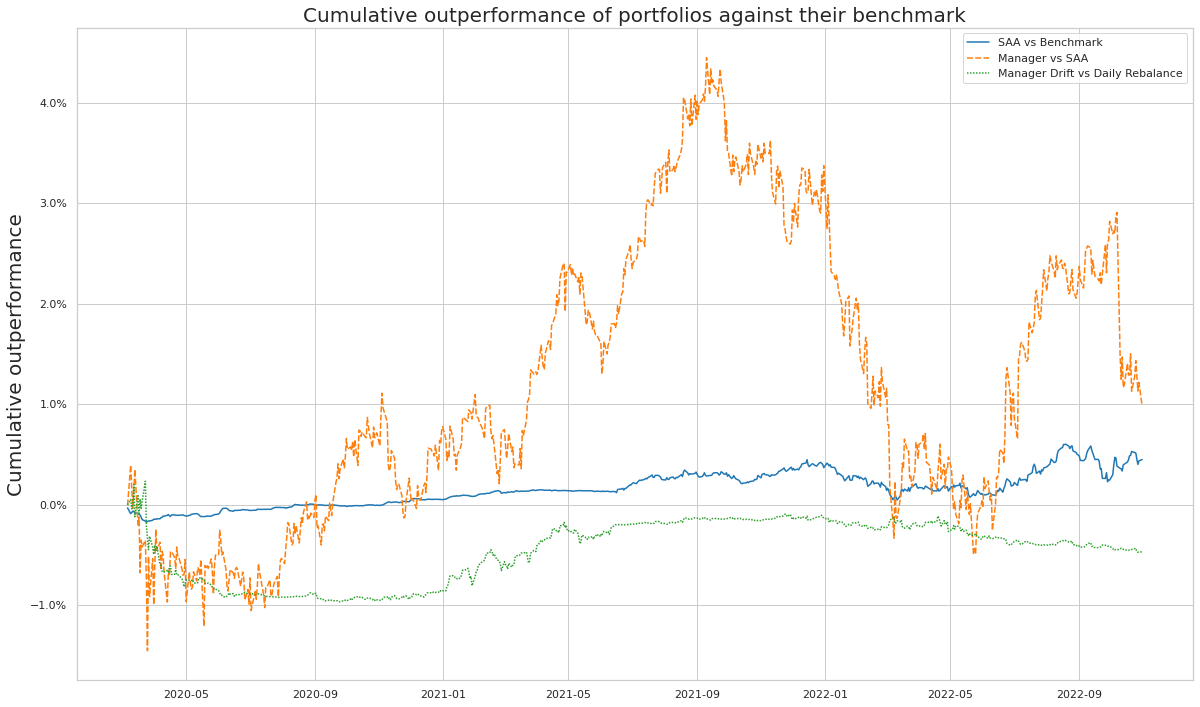

In [22]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.lineplot(data=outperformance_df * 100);
plt.ylabel("Cumulative outperformance", size=20)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Cumulative outperformance of portfolios against their benchmark", size=20);
fig.savefig("../img/results.jpg")